# Decision Trees

- Decision trees are non-parametric models
- It uses recursive binary splitting to grow a regression/classification tree
- Decision trees are greedy which only find the best split on the corresponding region at current timestep
- In regression trees, RSS is used to find the best split
- In classification trees, impurity is used to find the best split
- Best node is the feature+split pair with least RSS or impurity at current region

## Regression

Regression trees use RSS (Residual Sums of Squares) to split the current data space.

$RSS = \sum_i(y_i-y_{r1})^2 + \sum_i(y_i-y_{r2})^2$ <br><br>
where $y_{r1}$=average value of region 1, and $y_{r2}$=average value of region 2

## Classification

Classification trees use impurity to split the current data space. Common impurity measures are gini index, entropy and information gain.

$GI = 1 - \sum_j(p_j)^2$ <br>
$entropy = 1 - \sum_j(p_j*log(p_j))$ <br><br>
where j=target class <br>
$p_j$=probability of class j <br><br>

impurity_of_parent_node = weight_1 * impurity_of_region_1 + weight_2 * impurity_of_region_2<br>
weight = num_of_sample_in_the_region/total_num_of_sample_in_parent_region

In [116]:
from pathlib import Path

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [160]:
print("Train set:")
df_train = pd.read_csv("data/train.csv")
print(df_train.columns)
print(f"total columns: {len(df_train.columns)}")
print(f"total records: {len(df_train)}")

print("\nTest set:")
df_test = pd.read_csv("data/test.csv")
print(df_test.columns)
print(f"total columns: {len(df_test.columns)}")
print(f"total records: {len(df_test)}")

Train set:
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
total columns: 25
total records: 103904

Test set:
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', '

In [161]:
df_train = df_train.drop(columns=['Unnamed: 0', 'id'])
df_test = df_test.drop(columns=['Unnamed: 0', 'id'])

In [162]:
print(df_train.isna().sum())
print(df_test.isna().sum())

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64
Gender                                0
Cust

In [163]:
df_train = df_train.dropna()
df_test = df_test.dropna()

print(f"train: {len(df_train)}")
print(f"test: {len(df_test)}")

train: 103594
test: 25893


In [164]:
df_train.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [165]:
df_test.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [166]:
df_test['Arrival Delay in Minutes'].unique()

array([4.400e+01, 0.000e+00, 6.000e+00, 2.000e+01, 6.500e+01, 1.400e+01,
       1.900e+01, 7.000e+00, 1.130e+02, 2.000e+00, 4.900e+01, 1.300e+01,
       6.800e+01, 1.000e+00, 7.000e+01, 1.200e+01, 1.000e+01, 4.000e+00,
       1.770e+02, 3.000e+00, 5.500e+01, 9.000e+01, 3.200e+01, 4.600e+01,
       5.700e+01, 4.700e+01, 4.000e+01, 2.400e+01, 2.700e+01, 5.200e+01,
       1.700e+01, 1.100e+01, 3.400e+01, 9.500e+01, 6.600e+01, 8.000e+00,
       8.600e+01, 8.800e+01, 1.780e+02, 7.800e+01, 1.800e+01, 7.200e+01,
       4.100e+01, 9.100e+01, 3.500e+01, 1.600e+01, 2.500e+01, 7.700e+01,
       9.400e+01, 1.630e+02, 1.020e+02, 4.200e+01, 1.500e+01, 9.000e+00,
       8.500e+01, 2.300e+01, 2.800e+01, 3.000e+01, 7.100e+01, 5.000e+00,
       7.900e+01, 2.510e+02, 1.510e+02, 3.800e+01, 6.200e+01, 2.100e+01,
       2.900e+01, 9.300e+01, 2.320e+02, 1.560e+02, 1.170e+02, 2.600e+01,
       5.100e+01, 9.900e+01, 1.210e+02, 7.500e+01, 6.300e+01, 9.200e+01,
       4.500e+01, 1.230e+02, 1.290e+02, 8.400e+01, 

In [167]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].astype(np.int64)
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].astype(np.int64)

In [168]:
cat_feats = []
num_feats = []

for col, dtype in dict(df_train.dtypes).items():
    if dtype == np.dtypes.ObjectDType:
        cat_feats.append(col)
    elif dtype == np.int64:
        num_feats.append(col)

target = 'satisfaction'
cat_feats.remove(target)

print(cat_feats)
print(num_feats)
print(len(num_feats))

['Gender', 'Customer Type', 'Type of Travel', 'Class']
['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
18


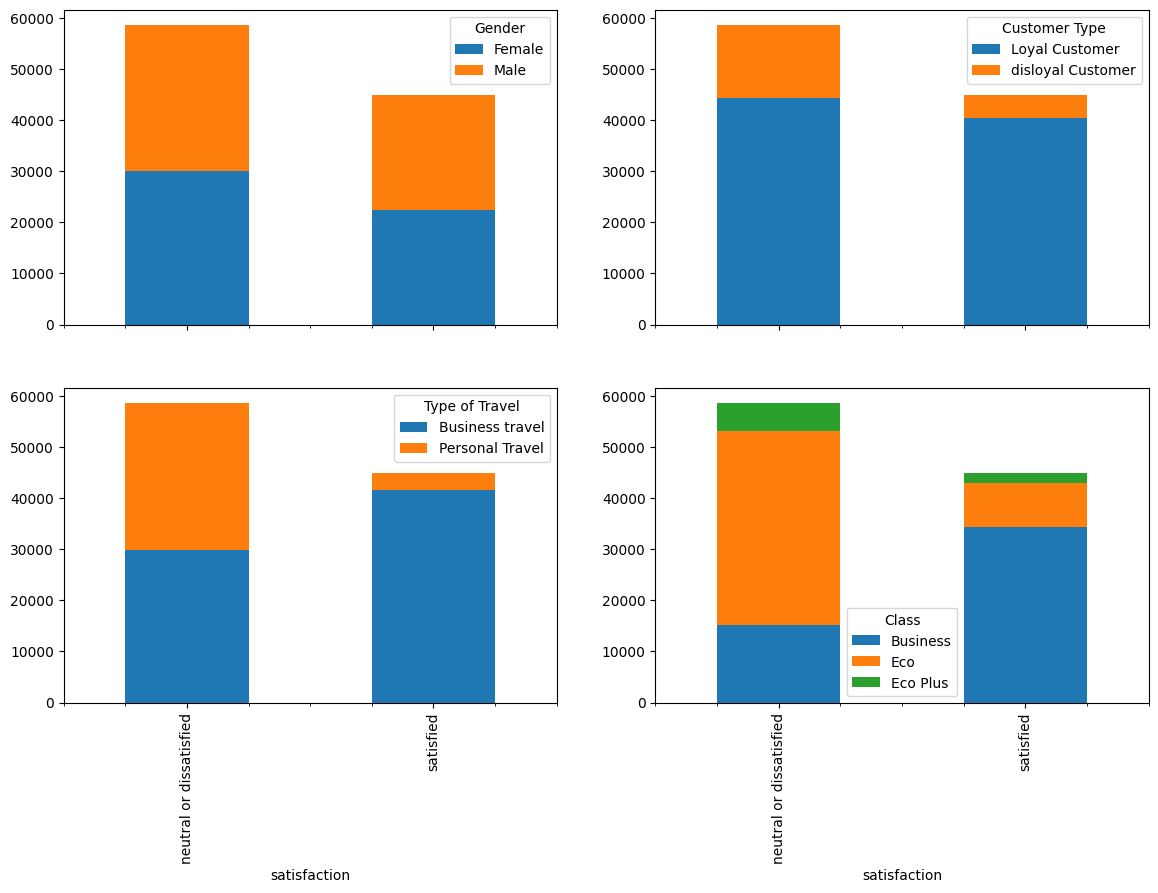

In [140]:
# Let's visualize correlation between categorical features against target

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(14, 9))

for i, col in enumerate(cat_feats):
    r = i // 2
    c = i % 2
    ax = axes[r][c]
    ct = pd.crosstab(df_train[target], df_train[col])
    ct.plot(kind='bar', stacked=True, ax=ax)

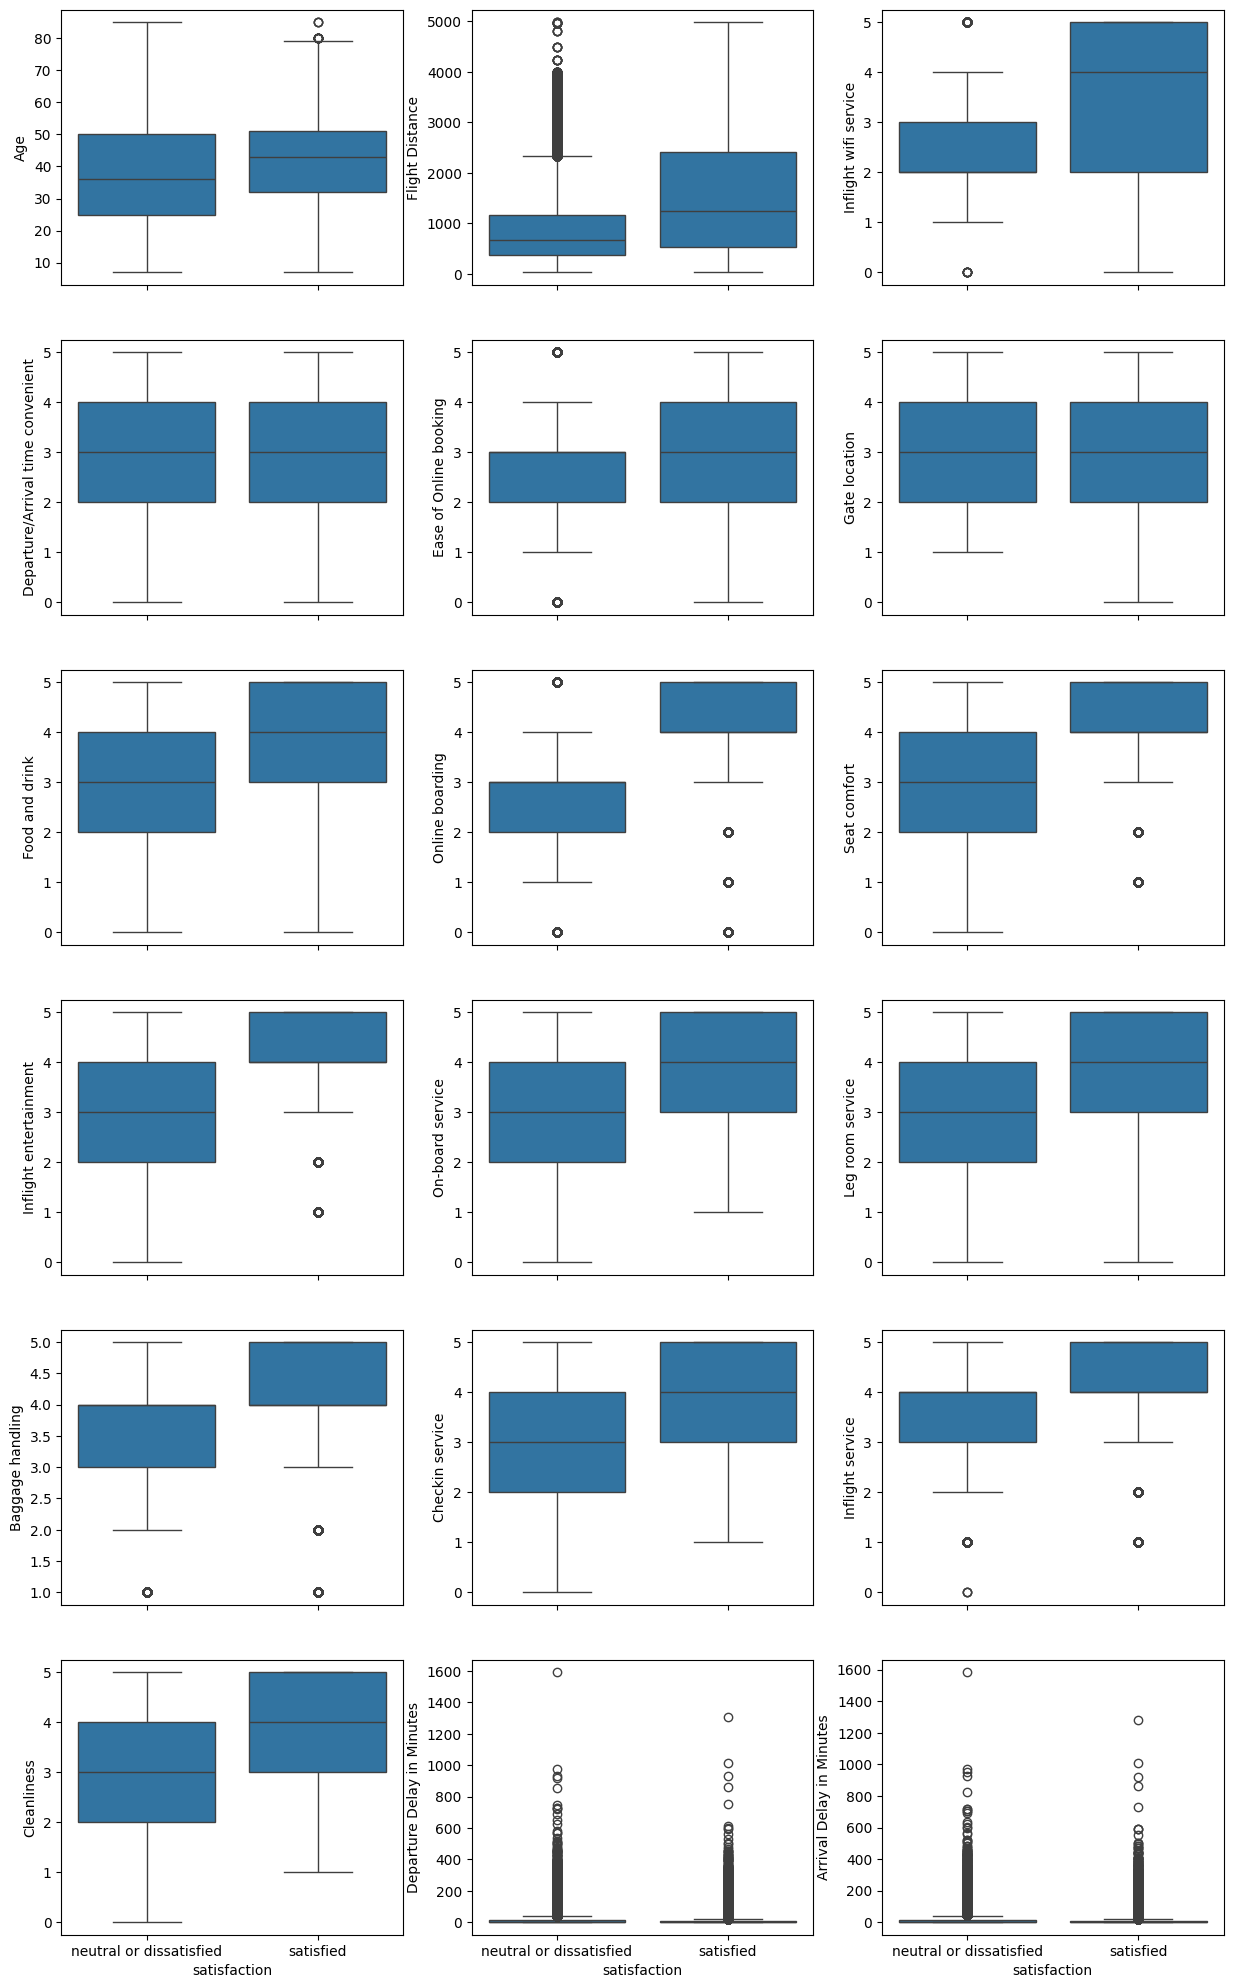

In [145]:
# Let's visualize correlation between numerical features against target

fig, axes = plt.subplots(nrows=6, ncols=3, sharex=True, figsize=(15, 25))

for i, col in enumerate(num_feats):
    r = i//3
    c = i%3
    ax = axes[r][c]
    sns.boxplot(x=target, y=col, data=df_train, ax=ax)

In [171]:
train_features = cat_feats + num_feats

for cf in cat_feats+[target]:
       encoder = OrdinalEncoder(categories=[list(df_train[cf].unique())])
       df_train[cf] = encoder.fit_transform(df_train[[cf]]).astype(int)
       
       encoder = OrdinalEncoder(categories=[list(df_test[cf].unique())])
       df_test[cf] = encoder.fit_transform(df_test[[cf]]).astype(int)
       
X_train = df_train[train_features]
y_train = df_train[target]

X_test = df_test[train_features]
y_test = df_test[target]

In [172]:
df_train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,0,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18,0
1,0,1,25,1,1,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6,0
2,1,0,26,1,1,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0,1
3,1,0,25,1,1,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9,0
4,0,0,61,1,1,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0,1


In [173]:
df_test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44,0
1,0,0,36,0,1,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0,0
2,1,1,20,0,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0,1
3,1,0,44,0,1,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6,0
4,0,0,49,0,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20,0


In [174]:
tree_dir = "trees"
Path(tree_dir).mkdir(parents=True, exist_ok=True)

In [175]:
# Baseline

exp_num = 1

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

export_graphviz(
    clf, 
    out_file=f"{tree_dir}/tree_{exp_num}.dot", 
    feature_names=list(X_train.columns),
    class_names=['disatisfied', 'satisfied'],
    filled=True, 
    rounded=True, 
    special_characters=True
)

!dot -Tpng trees/tree_{exp_num}.dot -o trees/tree_{exp_num}.png

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"y_test value counts: {y_test.value_counts()}\n")

print(f"accuracy: {accuracy}\n")

print("confusion matrix:")
print(cm)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.172985 to fit
y_test value counts: satisfaction
1    14528
0    11365
Name: count, dtype: int64

accuracy: 0.4220831885065462

confusion matrix:
[[ 6537  4828]
 [10136  4392]]


In above experiment, we can see that model results in slightly different fit across different runs because when multiple splits have same impurity score, model selects a random split. This behavior is not harmful but can be disabled by setting random_state parameter.

In [ ]:
# Fixed random state

exp_num = 1

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

export_graphviz(
    clf, 
    out_file=f"{tree_dir}/tree_{exp_num}.dot", 
    feature_names=list(X_train.columns),
    class_names=['Rejected', 'Approved'],
    filled=True, 
    rounded=True, 
    special_characters=True
)

!dot -Tpng trees/tree_{exp_num}.dot -o trees/tree_{exp_num}.png

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"y_test value counts: {y_test.value_counts()}\n")

print(f"accuracy: {accuracy}\n")

print("confusion matrix:")
print(cm)

y_test value counts: loan_status
1    121
0     79
Name: count, dtype: int64

accuracy: 0.99

confusion matrix:
[[ 79   0]
 [  2 119]]


In [ ]:
# Limiting max depth

exp_num = 2

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

export_graphviz(
    clf, 
    out_file=f"{tree_dir}/tree_{exp_num}.dot", 
    feature_names=list(X_train.columns),
    class_names=['Rejected', 'Approved'],
    filled=True, 
    rounded=True, 
    special_characters=True
)

!dot -Tpng trees/tree_{exp_num}.dot -o trees/tree_{exp_num}.png

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"y_test value counts: {y_test.value_counts()}\n")

print(f"accuracy: {accuracy}\n")

print("confusion matrix:")
print(cm)

y_test value counts: loan_status
1    121
0     79
Name: count, dtype: int64

accuracy: 0.98

confusion matrix:
[[ 77   2]
 [  2 119]]
